In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [15]:
def subplot(points1, points2, result1, result2, img):
    plt.imshow(img)
    plt.scatter(points1[:, 0], points1[:, 1], s=5, c='blue')
    plt.scatter(points2[:, 0], points2[:, 1], s=5, c='blue')
    plt.plot(result1[:, 0], result1[:, 1], 'r-', linewidth=0.5)
    plt.plot(result2[:, 0], result2[:, 1], 'r-', linewidth=0.5)
    plt.savefig('1a.png')
    plt.show()
    plt.close()

def plot(points, result, img):
    plt.imshow(img)
    plt.scatter(points[:, 0], points[:, 1], s=5)
    plt.plot(result[:, 0], result[:, 1], 'r-', linewidth=0.5)
    plt.savefig('1b.png')
    plt.show()
    plt.close()

In [3]:
def bezier_curve(points, t_values):
    n = len(points) - 1
    curve = np.zeros((len(t_values), 2))
    for i, t in enumerate(t_values):
        p = np.zeros(2)
        for k in range(n + 1):
            binomial_coeff = np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n - k))
            p += binomial_coeff * ((1 - t) ** (n - k)) * (t ** k) * points[k]
        curve[i] = p
    return curve

In [4]:
def nearest_inter(img, scale_factor=4):
    height, width, channels = img.shape
    new_height, new_width = height * scale_factor, width * scale_factor
    scale_up_img = np.zeros((new_height, new_width, channels), dtype=img.dtype)
    for i in range(new_height):
        for j in range(new_width):
            src_x = i // scale_factor
            src_y = j // scale_factor
            scale_up_img[i, j] = img[src_x, src_y]
    return scale_up_img

## 1.a

/var/folders/46/3y6d32b17r3_vbbn43wqrk_c0000gn/T/ipykernel_4765/4274130712.py:29: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  binomial_coeff = np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n - k))


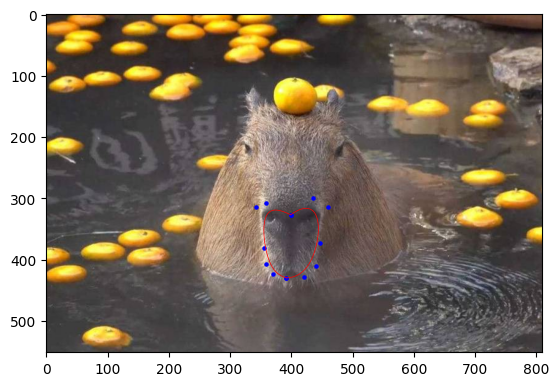

In [16]:
# 讀取圖片和點數據
img = cv2.imread("bg.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
points = np.loadtxt("points.txt")

# 分離點數據成兩組
points1 = points[[3, 2, 1, 12, 11, 10, 9]]
points2 = points[[9, 8, 7, 6, 5, 4, 3]]

# 生成低細節和高細節的 t 值
t_values_low = np.linspace(0, 1, 5)  # 0, 0.25, 0.50, 0.75, 1.0
t_values_high = np.linspace(0, 1, 10001)  # 0, 0.0001, 0.0002, ..., 1.0

# 計算貝茲曲線
result1_low = bezier_curve(points1, t_values_low)
result1_high = bezier_curve(points1, t_values_high)
result2_low = bezier_curve(points2, t_values_low)
result2_high = bezier_curve(points2, t_values_high)

# 繪製 (a) 的結果
subplot(points1, points2, result1_high, result2_high, img)


Bézier曲線的數學公式：

$$
B(t) = (1-t)^3P_0 + 3(1-t)^2tP_1 + 3(1-t)t^2P_2 + t^3P_3
$$
其中 t 是曲線參數，範圍為0到1。

高細節與低細節曲線的差異：

低細節曲線使用較少的取樣點（例如，t = {0, 0.25, 0.50, 0.75, 1.0}），因此曲線較為粗糙。
高細節曲線使用大量的取樣點（例如，t = {0, 0.0001, 0.0002, ..., 1.0}），因此曲線更加平滑和詳細。

## 1.b

/var/folders/46/3y6d32b17r3_vbbn43wqrk_c0000gn/T/ipykernel_4765/702956612.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  binomial_coeff = np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n - k))


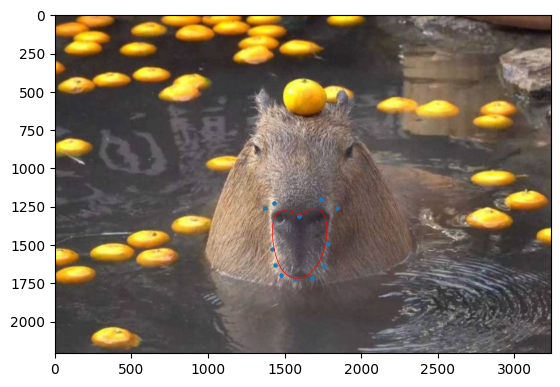

In [12]:
# 放大圖片和點數據，並繪製放大的曲線 (b)
scaled_img = nearest_inter(img, 4)
scaled_points1 = points1 * 4
scaled_points2 = points2 * 4
scaled_result1 = bezier_curve(scaled_points1, t_values_high)
scaled_result2 = bezier_curve(scaled_points2, t_values_high)

plot(np.vstack((scaled_points1, scaled_points2)), np.vstack((scaled_result1, scaled_result2)), scaled_img)

通過最近鄰插值方法將背景圖像和Bézier曲線的控制點放大4倍，並重新計算高細節Bézier曲線。這使得放大後的曲線仍能保持其平滑和詳細的特性。最終結果顯示在放大的背景圖像上。